# Import Statements

In [18]:
import pandas as pd # Imported to enable the use of datastructures like dataframe
import matplotlib.pyplot as plt # Imported to visusalise data
import seaborn as sns # Imported to visualise data
import numpy as np # Imported for calculations
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer # Imported to convert raw documents into a matrix of tf idf features
from sklearn.linear_model import LogisticRegression # Imported to enable the use of logistic regression to classify text
from sklearn.model_selection import train_test_split # Imported to enable the user to split the data into train, test samples
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # for report generation

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the dataset

In [19]:
path='/content/drive/MyDrive/Datasets/malayalam.tsv'
df = pd.read_csv(path, sep='\t')
print(df)

             category                                               text
0      unknown_state    Ichayan fans pinne mmade ettan fansm ivde oru...
1      not-malayalam              Tovi 🥰 Best Wishes From #Kunjikka Fans
2      unknown_state    Urutty koll .nallavanaaya unniyaya saiju kuru...
3      not-malayalam    Pls support me pls       My channel subscribe...
4           Positive      Kalki super hit akum enn Bonny parayan paranju
...               ...                                                ...
6734        Positive      Jayettanu eduthal pongayha role aan...next idi
6735        Positive                 This looks like... Thrishur pooram.
6736        Negative    Mammukka verum vishayam engneru eth enthonn c...
6737  Mixed_feelings    Pulikku pakaram patti odande vere mattam onnu...
6738        Positive    Ithin dislike addikunavar lokka tholvikallayi...

[6739 rows x 2 columns]


# Exploring the dataset

In [20]:
print(df.shape)
df.head()

(6739, 2)


,category,text
0,unknown_state,Ichayan fans pinne mmade ettan fansm ivde oru...
1,not-malayalam,Tovi 🥰 Best Wishes From #Kunjikka Fans
2,unknown_state,Urutty koll .nallavanaaya unniyaya saiju kuru...
3,not-malayalam,Pls support me pls My channel subscribe...
4,Positive,Kalki super hit akum enn Bonny parayan paranju


In [21]:
# Renaming the classes for convenience

# Removing any leading/trailing spaces
df['category'] = df['category'].str.strip()

# Replacing 'unknown_state' with 'Irrelevant'
df['category'] = df['category'].replace({'unknown_state': 'Neutral'})
df['category'] = df['category'].replace({'not-malayalam': 'Not-Malayalam'})

# Viewing the number of items in each class after replacement
print(df['category'].value_counts())  # Used to view the number of items in each class.

## There is a significant imbalance in the classes in this dataset

Positive          2811
Neutral           1903
Not-Malayalam      884
Negative           738
Mixed_feelings     403
Name: category, dtype: int64


In [22]:
# Creating dataframes for all categories for later use

df_positive_words = df[df['category']=='Positive']
df_negative_words = df[df['category']=='Negative']
df_mixed_feeling_words = df[df['category']=='Mixed_feelings']
df_neutral_words = df[df['category']=='Neutral']
df_not_malayalam_words = df[df['category']=='Not-Malayalam']

print(df_positive_words.shape)
print(df_negative_words.shape)
print(df_mixed_feeling_words.shape)
print(df_neutral_words.shape)
print(df_not_malayalam_words.shape)

(2811, 2)
(738, 2)
(403, 2)
(1903, 2)
(884, 2)


### Next we would need to map these classes into numbers for the machine learning model

In [23]:
df['label_num'] = df.category.map({
    'Positive':0,
    'Negative':1,
    'Mixed_feelings':2,
    'Neutral':3,
    'Not-Malayalam':4
})

df.head

<bound method NDFrame.head of             category                                               text  \
0            Neutral   Ichayan fans pinne mmade ettan fansm ivde oru...   
1      Not-Malayalam             Tovi 🥰 Best Wishes From #Kunjikka Fans   
2            Neutral   Urutty koll .nallavanaaya unniyaya saiju kuru...   
3      Not-Malayalam   Pls support me pls       My channel subscribe...   
4           Positive     Kalki super hit akum enn Bonny parayan paranju   
...              ...                                                ...   
6734        Positive     Jayettanu eduthal pongayha role aan...next idi   
6735        Positive                This looks like... Thrishur pooram.   
6736        Negative   Mammukka verum vishayam engneru eth enthonn c...   
6737  Mixed_feelings   Pulikku pakaram patti odande vere mattam onnu...   
6738        Positive   Ithin dislike addikunavar lokka tholvikallayi...   

      label_num  
0             3  
1             4  
2             3

# Preparing the Training, and Test Dataset

In [29]:
# Splitting the dataset

# Training Set: 70%
# Test Set: 20%
# Validation Set: 10%

X_train, X_temp, y_train, y_temp = train_test_split(
    df.text,
    df.category,
    test_size=.3, # 30% of samples will be present in temporary dataset
    random_state=40)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=1/3, # 10% -> X_val and rest 20% -> X_test
    random_state=40)

# print(X_train,y_train)

# Vectorization using TF-IDF
v = TfidfVectorizer()
X_train_tfidf = v.fit_transform(X_train)
X_test_tfidf = v.transform(X_test)

# print(X_test_tfidf)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(X_val.shape)

(4717, 12584)
(1348, 12584)
(674,)


# SVM Classification Model

In [30]:
# Train the SVM classifier
classifier = SVC(kernel='linear')
classifier.fit(X_train_tfidf, y_train)

# Predict the labels for the test set
predictions = classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6698813056379822


Accuracy: 0.6698813056379822

Classification Report:
                 precision    recall  f1-score   support

Mixed_feelings       0.59      0.21      0.30        78
      Negative       0.72      0.49      0.58       145
       Neutral       0.65      0.62      0.63       370
 Not-Malayalam       0.71      0.64      0.67       174
      Positive       0.67      0.82      0.73       581

      accuracy                           0.67      1348
     macro avg       0.67      0.55      0.59      1348
  weighted avg       0.67      0.67      0.66      1348



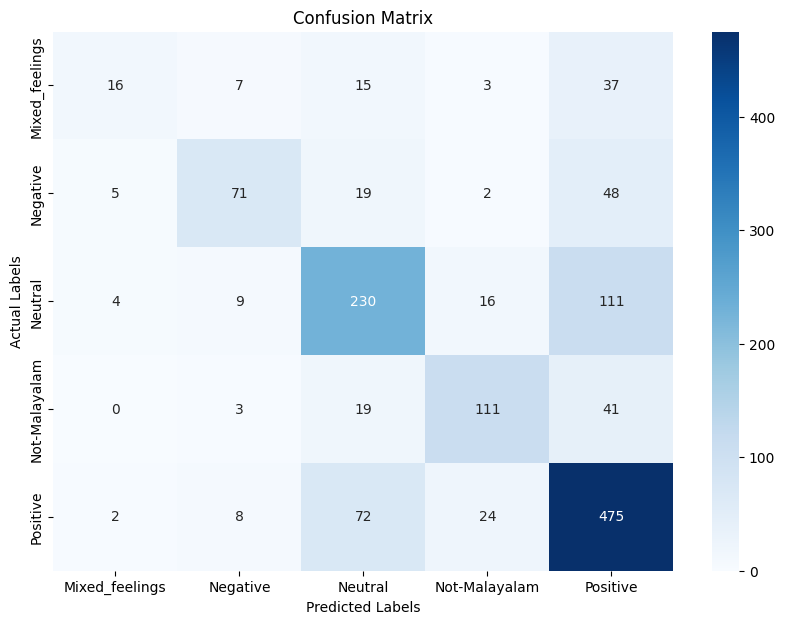

In [31]:
# Assuming predictions have been made as shown earlier
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
class_names = np.unique(y_test)  # Assuming y_test contains your actual labels

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()